In [1]:
import plotly.graph_objects as go
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
##import pycountry
##import numpy as np

df = pd.read_excel('https://iea.blob.core.windows.net/assets/6296011e-4fed-40c3-95a0-1367a4c4484a/CO2Highlights2020.xls', 
                   'CO2 FC', header=23, usecols=[0, 47, 48, 49], na_values='..')
df.columns = df.columns.astype(str)
df = df.round({'2017' : 2, '2018' : 2, '2019' : 2})
df2 = df[df['Region/Country/Economy'].str.contains('OECD')==False]
df2 = df2.drop(df2.index[152:163])
df2 = df2.sort_values('Region/Country/Economy', ascending=True)
df2.reset_index(drop=True, inplace=True)
##df2['Country Code'] = np.where(df2['Region/Country/Economy'] == data['Country Code'])
##my_list = list(df)
##print(my_list)
df2.head(40)

,Region/Country/Economy,2017,2018,2019
0,Africa,1204.03,1244.89,NaN
1,Albania,4.34,4.30,NaN
2,Algeria,130.53,137.28,NaN
3,Angola,18.88,18.80,NaN
4,Argentina,173.93,171.16,NaN
5,Armenia,5.17,5.39,NaN
6,Asia (excl. China),4188.55,4421.40,NaN
7,Australia,383.79,382.88,388.70
8,Austria,64.12,61.47,62.75
9,Azerbaijan,30.81,30.95,NaN


In [2]:
nr = pd.read_excel(r'C:\Users\ebloom\Desktop\Data_Extract_From_Adjusted_Net_Savings.xlsx',
                   usecols=["Country Name", "Country Code", "2017 [YR2017]", "2018 [YR2018]", "2019 [YR2019]"],
                  na_values=["0", ".."])
nr.rename(columns = {"2017 [YR2017]" : "2017", "2018 [YR2018]" : "2018", "2019 [YR2019]" : "2019"}, inplace=True)
nr = nr.round({'2017' : 2, '2018' : 2, '2019' : 2})
nr = nr.drop(nr.index[264:269])
nr = nr.drop(nr.index[0:47])
nr

,Country Name,Country Code,2017,2018,2019
47,Aruba,ABW,0.00,NaN,NaN
48,Afghanistan,AFG,0.70,0.92,0.77
49,Angola,AGO,16.45,27.43,26.19
50,Albania,ALB,1.36,1.82,1.59
51,Andorra,AND,NaN,NaN,NaN
...,...,...,...,...,...
259,Kosovo,XKX,0.55,0.55,0.40
260,"Yemen, Rep.",YEM,2.00,4.44,5.44
261,South Africa,ZAF,3.64,3.60,3.94
262,Zambia,ZMB,13.30,11.31,6.43


In [3]:
geojson = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merge2 = nr.merge(df2, how='left', left_on='Country Name', right_on='Region/Country/Economy')
##merge2.dropna(subset=['2019_x', '2018_y'], inplace=True)
merge = geojson.merge(merge2, how='left', left_on='iso_a3', right_on='Country Code')
merge.dropna(subset=['2019_x', '2018_y'], inplace=True)
merge.drop(index=18, inplace=True)


Text(0.5, 1.0, 'World Natural Resource Rents/Carbon Dioxide Emissions by Country')

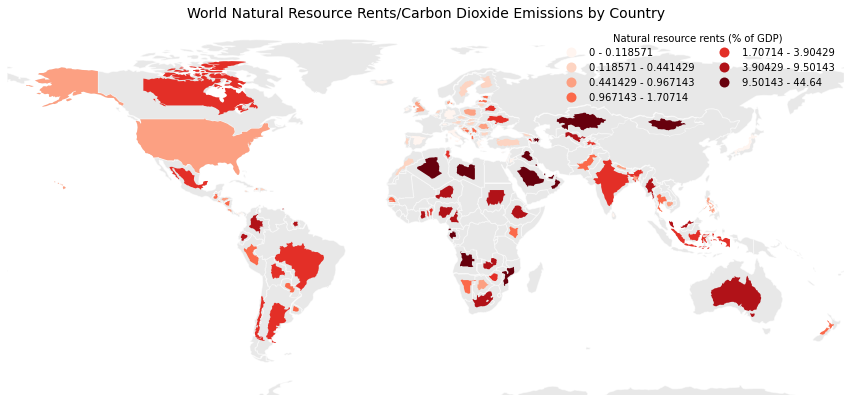

In [13]:
import mapclassify as mc
import matplotlib.pyplot as plt

ax = gplt.polyplot(geojson, facecolor='lightgray', projection=gcrs.PlateCarree(), alpha=0.5, edgecolor='white', figsize=(15,15))
scheme = mc.Quantiles(merge['2019_x'], k=7)
##arrange into 7 equal width bins
gplt.cartogram(
    merge, scale='2018_y', hue='2019_x',
    legend=True, legend_var='hue', legend_kwargs={'title': 'Natural resource rents (% of GDP)', 'frameon': False, 'ncol': 2},
    limits=(0.5, 1), figsize=(10,10),
    cmap='Reds', ax=ax, scheme=scheme
    )

plt.title("World Natural Resource Rents/Carbon Dioxide Emissions by Country", fontsize=14)
##https://residentmario.github.io/geoplot/user_guide/Customizing_Plots.html
##https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.legend.html
##https://geopandas.org/docs/user_guide/projections.html

In [5]:
geojson.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
geojson = geojson.to_crs("EPSG:4326")
geojson.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
geojson.loc[geojson['name'] == 'Russia']


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
18,142257519,Europe,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.725 71.099, 180.000 71.516..."


In [8]:
merge = merge.to_crs("EPSG:4326")
merge.loc[merge['name'] == 'Russia']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country Name,Country Code,2017_x,2018_x,2019_x,Region/Country/Economy,2017_y,2018_y,2019_y


merge = merge.to_crs("EPSG:4326")
merge.loc[merge['name'] == 'Russia']

<AxesSubplot:>

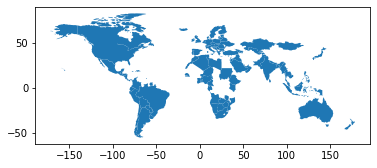

In [9]:
merge.plot()